# Задача изоморфизма

***Постановка задачи.*** Установить, есть ли взаимнооднозначное отображение вершин из графа $G_1$ в вершины графа $G_2$.  
Установить, является ли граф $G_1$ подграфом графа $G_2$.

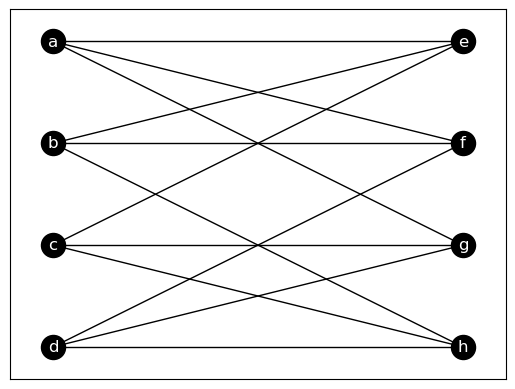

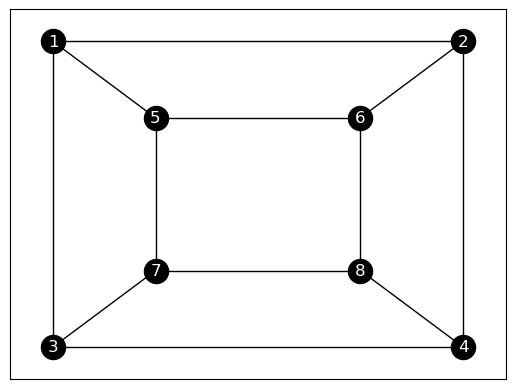

In [1]:
import matplotlib.pyplot as plt
import networkx as nx


graph_1 = nx.Graph()
graph_1.add_edges_from([
    ('a', 'e'),
    ('a', 'f'),
    ('a', 'g'),
    ('b', 'e'),
    ('b', 'f'),
    ('b', 'h'),
    ('c', 'e'),
    ('c', 'g'),
    ('c', 'h'),
    ('d', 'f'),
    ('d', 'g'),
    ('d', 'h')
])

layout = {
    'a': [-1, 1.5],
    'b': [-1, 0.5],
    'c': [-1, -0.5],
    'd': [-1, -1.5],
    'e': [1, 1.5],
    'f': [1, 0.5],
    'g': [1, -0.5],
    'h': [1, -1.5]
}

nx.draw_networkx(graph_1, pos=layout, node_color='black', font_color='white')
plt.show()

graph_2 = nx.Graph()
graph_2.add_edges_from([
    (1, 2),
    (1, 3),
    (1, 5),
    (2, 6),
    (2, 4),
    (3, 7),
    (3, 4),
    (4, 8),
    (5, 6),
    (5, 7),
    (6, 8),
    (7, 8)
])

layout = {
    1: [-2, 2],
    2: [2, 2],
    3: [-2, -2],
    4: [2, -2],
    5: [-1, 1],
    6: [1, 1],
    7: [-1, -1],
    8: [1, -1]
}

nx.draw_networkx(graph_2, pos=layout, node_color='black', font_color='white')
plt.show()

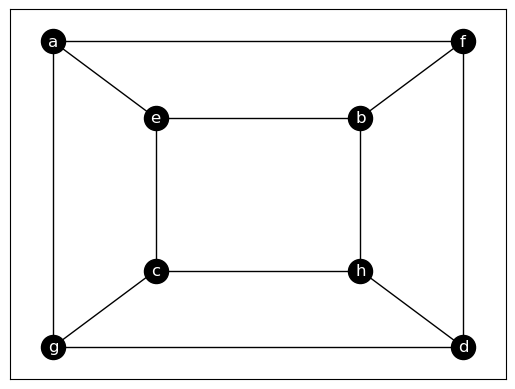

In [2]:
layout = {
    'a': [-2, 2],
    'f': [2, 2],
    'g': [-2, -2],
    'd': [2, -2],
    'e': [-1, 1],
    'b': [1, 1],
    'c': [-1, -1],
    'h': [1, -1]
}

nx.draw_networkx(graph_1, pos=layout, node_color='black', font_color='white')
plt.show()

# Алгоритм Ульмана

Переберем все возможные отображения вершин графа $G_1$ в вершины графа $G_2$. Для каждого отображения произведем проверку, является ли оно изоморфизмом. Сложность алгоритма $-$ $O(|V|!|V|^3)$

***Утверждение.*** При отображении изоморфизма графов вершина $u \in G_1$ переходит в вершину $v \in G_2$ $\iff$ Степень вершин $u$ и $v$ совпадает.

Произведем построение матрицы, состоящей из нулей и единиц. Строки матрицы отражают вершины графа $G_1$, столбцы $-$ $G_2$. Единица ставится тогда и только тогда, когда степень вершин совпадает.

Теперь запускаем полный перебор для вершин графа $G_1$ лищь по тем вершинам графа $G_2$, на пересечении с которыми в матрице стоят единицы.

# Поиск подграфа в графе

![](./images/isomorphism_1.png)
![](./images/isomorphism_2.png)

Для каждой вершины из графа $G_1$ выберем набор кандидатов из графа $G_1$, таких, что $ v \in G_1, u \in G_2 : d(v) \leq d(u) $

Для представленного примера набор кандидатов следующий:

- $ a : \{1, 2, 5, 6, 7\} $
- $ b : \{1, 2, 5, 6, 7\} $
- $ c : \{6\} $
- $ d : \{1, 2, 3, 4, 5, 6, 7, 8\} $

Теперь отсекаем число кандидатов у каждой вершины: выбираем вершину с наименьшим числом кандидатов. Вычеркиваем данных кандидатов у всех остальных вершин. Далее проходим по смежным вершинам и отсекаем у них тех кандидатов, которые не являются инцидентными ни одному из кандидатов данной вершины. Продолжаем данные действия для всех вершин. 